<a href="https://colab.research.google.com/github/tanyajainC137/Titanic-Machine-Learning-from-Disaster/blob/master/titanic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [499]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [500]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [501]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [502]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
D              3
              ..
A26            1
E36            1
E31            1
B80            1
A36            1
Name: Cabin, Length: 147, dtype: int64

In [503]:
embark = {'S':1,'C':2,'Q':3}
gender = { 'male': 1, 'female':0}
train['Embarked']=train['Embarked'].map(embark)
train['Sex']= train['Sex'].map(gender)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0


In [504]:
train['Fare'].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [0]:
train = train.drop(columns =['PassengerId', 'Name', 'Ticket', "Cabin"] )

In [506]:
train['Fare'] = np.around(train['Fare'], decimals =2)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,1.0
1,1,1,0,38.0,1,0,71.28,2.0
2,1,3,0,26.0,0,0,7.92,1.0
3,1,1,0,35.0,1,0,53.10,1.0
4,0,3,1,35.0,0,0,8.05,1.0


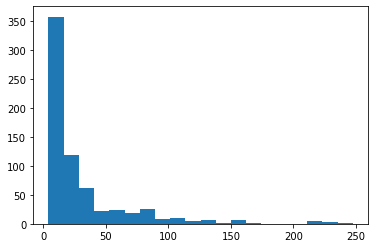

In [522]:
plt.hist(train['Fare'], bins = 20)
plt.show()

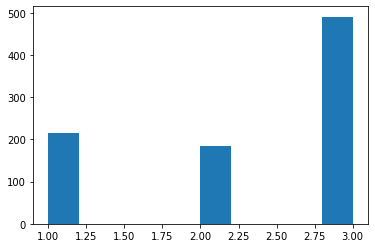

In [508]:
plt.hist(train['Pclass'])
plt.show()

In [526]:
def remove_outlier(df):
      q1 = 0.25
      q3 = 0.75
      IQR = q3-q1
	    low = q1-(1.5*IQR)
	    high = q3+(1.5*IQR)
	    quant_df = df.quantile([low, high])
	    for name in list(df.columns):
	        df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
	    return df
train['Age'] = remove_outlier(train[['Age']])
train['Fare'] = remove_outlier(train[['Fare']])
train.describe()

TabError: ignored

In [0]:
train.index[train['Fare'] == 512.33]
train.drop(index = [258, 679, 737], inplace=True)

In [510]:
train.dropna(inplace = True)

train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,674.000000,674.000000,674.00000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,0.396142,2.258160,0.62908,29.672849,0.491098,0.403561,30.868902,1.255193
std,0.489458,0.829508,0.48341,13.413368,0.901086,0.837664,37.703734,0.520182
min,0.000000,1.000000,0.00000,2.000000,0.000000,0.000000,4.010000,1.000000
25%,0.000000,2.000000,0.00000,21.000000,0.000000,0.000000,8.050000,1.000000
50%,0.000000,3.000000,1.00000,28.000000,0.000000,0.000000,15.150000,1.000000
75%,1.000000,3.000000,1.00000,38.000000,1.000000,1.000000,31.280000,1.000000
max,1.000000,3.000000,1.00000,65.000000,5.000000,6.000000,247.520000,3.000000


In [0]:
target = train['Survived']
features_names =['Pclass', 'Sex', 'Age',  'SibSp', 'Parch','Fare', 'Embarked']
features = np.array(train[features_names])

In [512]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
features = scale.fit_transform(features)
features

array([[1.        , 1.        , 0.31746032, ..., 0.        , 0.01330541,
        0.        ],
       [0.        , 0.        , 0.57142857, ..., 0.        , 0.27625149,
        0.5       ],
       [1.        , 0.        , 0.38095238, ..., 0.        , 0.01605684,
        0.        ],
       ...,
       [0.        , 0.        , 0.26984127, ..., 0.        , 0.10673073,
        0.        ],
       [0.        , 1.        , 0.38095238, ..., 0.        , 0.10673073,
        0.5       ],
       [1.        , 1.        , 0.47619048, ..., 0.        , 0.01535871,
        1.        ]])

In [0]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(features, target,  test_size =0.25)

In [519]:
from sklearn.tree import DecisionTreeClassifier as DTC

clf = DTC(random_state= 1)

clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.7988165680473372

In [517]:
from sklearn.model_selection import cross_val_score
clf = DTC(random_state= 1)
score = cross_val_score(clf, features, target, cv =10 )
score.mean()

0.7642230026338893

In [518]:
from sklearn.ensemble import RandomForestClassifier as RFC

clf = RFC(n_estimators = 100, random_state= 1)

score = cross_val_score(clf, features, target, cv =10 )
score.mean()

0.7909789288849869

In [539]:
#support vector machines
import sklearn.svm as svm

svc = svm.SVC(kernel='poly', degree= 2, C=1.0)

scores = cross_val_score(svc, features, target, cv=10)
print(scores.mean())

0.8026558384547849
